In [ ]:
pip install canvasapi

     |████████████████████████████████| 80 kB 3.7 MB/s 
  Created wheel for canvasapi: filename=canvasapi-2.2.0-py3-none-any.whl size=104561 sha256=52f9b2657e10a40a138159a5ba4b3e76f9bdd65a5398453e691e18146a2bb0e0
  Stored in directory: /root/.cache/pip/wheels/32/27/2c/c800f5f34241d1eceb9e99fc29621006d1dd679721ce7d0cd7
Successfully built canvasapi


In [ ]:
pip install plyer

     |████████████████████████████████| 131 kB 6.8 MB/s 


In [ ]:
from canvasapi import Canvas
from time import sleep
from datetime import datetime, timedelta
import pytz
from plyer import notification
import matplotlib.pyplot as plt
utc = pytz.UTC

Please Generate your personal API Token from Canvas Settings and replace the API_token with your token.

In [ ]:
API_url = "https://canvas.case.edu/"

#add the token here
API_token = ""

canvas = Canvas(API_url, API_token)

In [ ]:
run_program()

Enter 1 for Searching a course
Enter 2 for Searching an assignment in all the courses
Enter 3 for Searching for assignments due in the next 7 days
What do you want to do?1
Enter the code of the course: 23369
You entered 23369
Checking if 23369 exists in your course list
The class associated with the code exists 
The class is MATH 121 Calculus for Science and Engineering I (100/1209) (23369)
Do you want to try another search?
Enter y for another search and N to exitn
You exited the search function
Do you want to run the program again? n


In [ ]:

def run_program():
    run_again = True
    while run_again is True:
        print("Enter 1 for Searching a course")
        print("Enter 2 for Searching an assignment in all the courses")
        print("Enter 3 for Searching for assignments due in the next 7 days")
        user_choice = int(input("What do you want to do?"))
        
        selection(user_choice)

        inp = input("Do you want to run the program again? ")
    
        if inp.lower() in ['y', 'yes']:
            run_again = True
        elif inp.lower() in ['n', 'no']:
            run_again = False

def selection(user_choice):
    if user_choice == 1:
        search_for_course()
    elif user_choice is 2:
        search_for_assignment()
    elif user_choice is 3:
        list_of_hw = assignment_before_date()
        print(list_of_hw)
        print("Enter Y or N")
        visual = str(input("Do You want to see visualizations of assignments due in the next 7 days?"))
        if visual.lower() == 'y':
            plot_bar_chart(list_of_hw)
            plot_pychart(list_of_hw)
        #elif visualization == 'N':



In [ ]:
courseList = canvas.get_courses()
for course in courseList:
    try:
        print(course)
    except:
        continue

InvalidAccessToken: ignored

In [ ]:
#list to store the ID of all the classes
courseIdList = []
for course in courseList:
#  print(course.id)
  courseIdList.append(course.id)

In [ ]:
# loop to iterate through the ID list and then return the name of the classes
#for id in courseIdList:
#  print("Course Name: "+ str(canvas.get_course(id)))

In [ ]:
#assignments = courseList[0].get_assignments()
#for assign in assignments:
#  print(assign)

In [ ]:
# this is a function to make the a data type with the course codes and the course assignment details
# We store the assignment name
# format of the datatype: 
# {
#  course_code_1 : [assignment1, assignment2...]  
#  course_code_2 : [assignment1, assignment2...]  
#  course_code_3 : [assignment1, assignment2...]  
# }

def make_list_of_courses(courseIdList):
  courses_dict = {}
  for course in courseIdList:
    try:
        course_name = canvas.get_course(course).course_code
        #print(course_name)
        courses_dict[course_name] = {}
        courses_dict[course_name]["assignments"] = []
        courses_dict[course_name]["code"] = canvas.get_course(course).id
        assignments_list = []
        for assignment in canvas.get_course(course).get_assignments():
        #print(assignment)
            assignments_list.append(assignment.id)
            courses_dict[course_name]["assignments"] = assignments_list
    except:
        continue
  return courses_dict

#make_list_of_courses(courseIdList)



In [ ]:
course_assigments = {}
course_assignments = make_list_of_courses(courseIdList)

In [ ]:
#this allows the program to take input from the user and check if the course exists

search_for_course()

In [ ]:
# this is a method to take input from the user and checks if the course code exists in the Canvas Dashboard
# The method calls the 'checking_course' method that checks if the course exists
def search_for_course():
  course_code = input('Enter the code of the course: ')
  print(f'You entered {course_code}')
  print(f'Checking if {course_code} exists in your course list')
  sleep(1)
  checking_course(course_code)

# additionally, we ask the user if they want to try another search or they want to exit the search function
  print('Do you want to try another search?')
  search = input('Enter y for another search and N to exit')
  searching_loop_check(search)

In [ ]:
# this method checks if the user wants to try another search or if they want to exit the search function
# We check if the response is y or yes after converting it to lower case to handle exceptions
# if response is yes, we call the search function again
# if the response is no or n, we print a message 
# if response is neither yes or no, we prompt another message asking for a valid argument

def searching_loop_check(response):
  if response.lower() in ['y', 'yes']:
    search_for_course()
  elif response.lower() in ['n', 'no']:
    print('You exited the search function')
  else:
    print('Please enter a valid argument')
    search = input('Enter y for another search and N to exit')
    searching_loop_check(search)
    

In [ ]:
# this method uses try-except hanlding while checking if the course exists
# we try to get the course from the course_code input 
# if we get a course object back from the Canvas API, we print that we found the course along with the course code
# if we do not get a course back and get an error, it is handled by the except block that prints a message saying the class does not exist
def checking_course(course_code_to_check):
  try:
    course_code = canvas.get_course(course_code_to_check)
    print('The class associated with the code exists ')
    print('The class is ' + str(course_code))
  except:
    print('The class code you enterred does not exist!')

In [ ]:
# This method allows the program to take input from the user and check if the assignment exists

search_for_assignment()

In [ ]:
# This method allows the user to check if an assignment exists


def search_for_assignment():
  assignment_search = input('Enter the cassignment you want to search for: ')
  print(f'You entered {assignment_search}')
  print(f'Checking if {assignment_search} exists in your assignment list')
  sleep(1)
  assignment_checking(assignment_search)

# additionally, we ask the user if they want to try another search or they want to exit the search function
  print('Do you want to try another search?')
  search = input('Enter y for another search and N to exit')
  assignment_loop_check(search)

In [ ]:
# First we make a list of the assignments from all the 

def assignment_checking(to_search):
  list_of_assignments = make_list_of_courses(courseIdList)
  found = False
  
  print("We found the following assignments with the similar name: ")
  for courses in list_of_assignments.keys():
    course_name = courses

    
    for assignment in list_of_assignments[course_name]["assignments"]:
      course_code = list_of_assignments[course_name]["code"]
      #print(course_name +" " + str(assignment)+ " "+ str(course_code))
      if to_search.lower() in canvas.get_course(course_code).get_assignment(assignment).name.lower():      
            print( course_name + " " + canvas.get_course(course_code).get_assignment(assignment).name)
            found = True
  if found is False:
    print("Sorry we could not find the assignment!!") 
  print("We found the assignments given above")

In [ ]:
def assignment_loop_check(response):
  if response.lower() in ['y', 'yes']:
    search_for_assignment()
  elif response.lower() in ['n', 'no']:
    print('You exited the search for assignment function')
  else:
    print('Please enter a valid argument')
    search = input('Enter y for another search and N to exit')
    assignment_loop_check(search)

In [ ]:
# This method allows us to search for assignments due in the next 7 days
# This returns a list of assignments 
# upcoming_assignments is a dictionary that stores the courses along with the assignments that are due in the next 7 days
# upcoming_deadlines is a list to store the assignment code and dates stores the date of the deadline
def assignment_before_date():
  courses_list = make_list_of_courses(courseIdList)
  upcoming_assignments =  {}
  for courses in courses_list.keys():
    course_name = courses

    #these are two lists, one that stores the assignment code and the other stores the date of the deadline
    upcoming_deadlines = []
    dates = []
    for assignment in courses_list[course_name]["assignments"]:
      course_code = courses_list[course_name]["code"]
      
      #try-except block to see handle errors and exceptions 
      try:
        date_today = datetime.now().replace(tzinfo=utc)
        date7days_from_now = date_today + timedelta(days = 7)
        due_date_of_assignment = canvas.get_course(course_code).get_assignment(assignment).due_at_date
       
       #Checks if the due date of current assignment is between today and the 7th day
        if ((due_date_of_assignment > date_today) and (due_date_of_assignment < date7days_from_now)):
          upcoming_deadlines.append(assignment)
          dates.append(due_date_of_assignment.date())
      except:
        continue

    # if the list storing the upcoming deadlines is not empty, then we store the details in another list along with the assignment details and the date
    if len(upcoming_deadlines) is not 0:  
      upcoming_assignments[course_name] = upcoming_deadlines, dates
  return upcoming_assignments
print(assignment_before_date())

{'ACCT 100': ([347541, 355573], [datetime.date(2021, 12, 5), datetime.date(2021, 12, 3)]), 'CSDS 132': ([359954, 377027, 378328, 378329, 378330], [datetime.date(2021, 12, 3), datetime.date(2021, 12, 6), datetime.date(2021, 12, 6), datetime.date(2021, 12, 6), datetime.date(2021, 12, 6)])}


In [ ]:
list_off_assignments_this_week = assignment_before_date()
print(list_off_assignments_this_week)

{'ACCT 100': ([347541, 355573], [datetime.date(2021, 12, 5), datetime.date(2021, 12, 3)]), 'CSDS 132': ([359954, 377027, 378328, 378329, 378330], [datetime.date(2021, 12, 3), datetime.date(2021, 12, 6), datetime.date(2021, 12, 6), datetime.date(2021, 12, 6), datetime.date(2021, 12, 6)])}


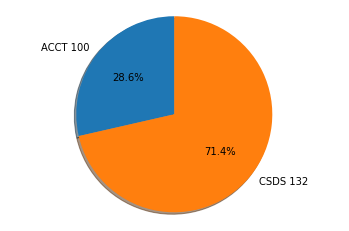

In [ ]:

def plot_pychart(list_of_assigments):
    # Pie chart, where the slices will be ordered and plotted counter-clockwise:
    labels = []
    sizes = []
    for course in list_of_assigments:
        labels.append(str(course))
        sizes.append(len(list_of_assigments[course][0]))


    #explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.show()

plot_pychart(list_off_assignments_this_week)

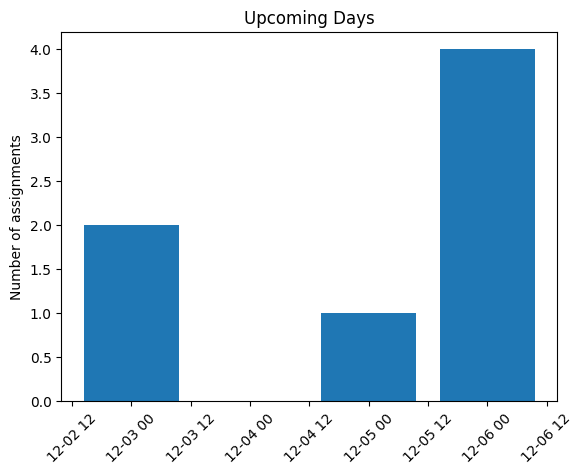

In [ ]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt

def plot_bar_chart(list_of_assignments):
    list_dates = {}
    for course in list_of_assignments:
        for assignment in list_of_assignments[course][1]:
            #print(assignment)
            if assignment not in list_dates:
                list_dates[assignment] = 0
            list_dates[assignment] = list_dates[assignment] + 1
            

    #print(list_dates)
    x = list_dates.keys()
    y = list_dates.values()
    plt.bar(x,y)
    #plt.bar(list_dates.keys(), list_dates.values(), align='center', alpha=0.1, width = 0.4)
    plt.ylabel('Number of assignments')
    plt.title('Upcoming Days')
    plt.xticks(rotation = 45)
    plt.show()

plot_bar_chart(list_off_assignments_this_week)